In [2]:
import pandas as pd
movement_file = "files/lsc22_metadata_with_movement.csv"
metadata = pd.read_csv(movement_file, sep=',', decimal='.')

In [71]:
from collections import defaultdict
moves = defaultdict(list)
low_moves = defaultdict(list)
for movement, prob, images in zip(metadata["movement"], metadata["movement_prob"], metadata["ImageID"]):
    if str(movement) != "nan":
        movement = movement.replace("side", "door")
        if prob > 0.6:
            moves[movement].append((images, prob))
        else:
            low_moves[movement].append((images, prob))

In [86]:
import bamboolib as bam
metadata

       Unnamed: 0      minute_id utc_time local_time  latitude  longitude  \
0               0  20190101_0000      NaN        NaN       NaN        NaN   
1               1  20190101_0001      NaN        NaN       NaN        NaN   
2               2  20190101_0002      NaN        NaN       NaN        NaN   
3               3  20190101_0003      NaN        NaN       NaN        NaN   
4               4  20190101_0004      NaN        NaN       NaN        NaN   
...           ...            ...      ...        ...       ...        ...   
44635       44635  20190131_2355      NaN        NaN       NaN        NaN   
44636       44636  20190131_2356      NaN        NaN       NaN        NaN   
44637       44637  20190131_2357      NaN        NaN       NaN        NaN   
44638       44638  20190131_2358      NaN        NaN       NaN        NaN   
44639       44639  20190131_2359      NaN        NaN       NaN        NaN   

       altitude semantic_name time_zone  heart_rate(bpm)  ...  minutesAslee

In [73]:
import matplotlib.pyplot as plt
from PIL import Image
import json
def plot_images(images):
    plt.rcParams.update({'font.size': 16})
    plt.figure(figsize=(20, len(images)))
    k = 0
    for filename, prob in images:
        filename = json.loads(filename.replace("'", "\""))[0]
        image = Image.open("../../original_data/201901/"+ filename[6:8] + "/" + filename).convert("RGB")
        ax = plt.subplot(len(images) // 5 + 1, 5, k+1)
        ax.imshow(image)
        ax.axis('off')
        ax.set_title(prob)
        k += 1
    plt.tight_layout()

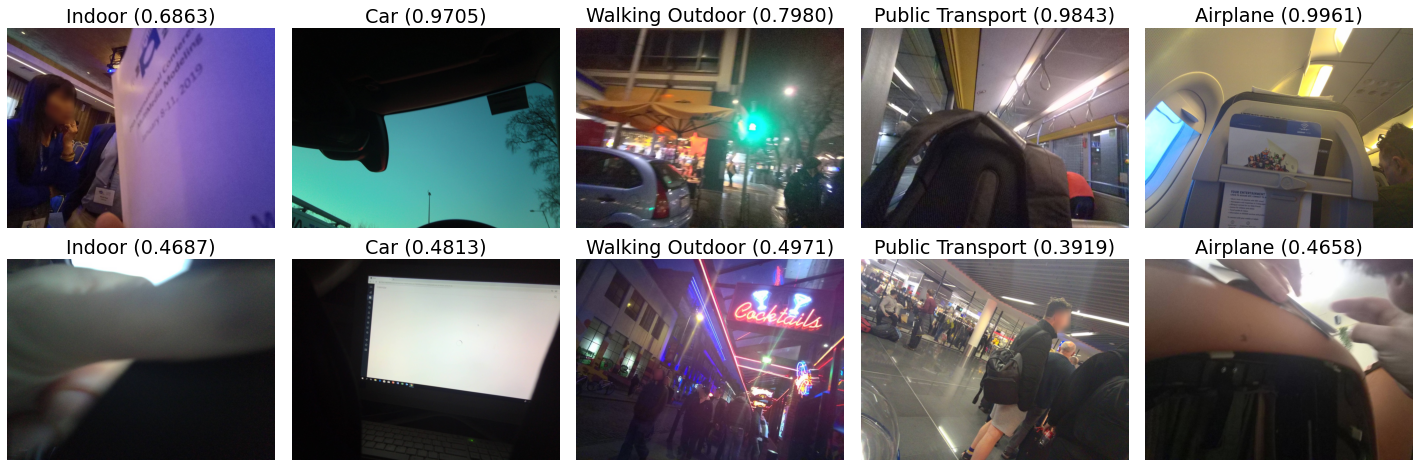

In [93]:
images = []
for key in moves:
    if len(moves[key]):
        image = random.choice(moves[key])
        images.append((image[0], f"{key} ({image[1]:0.4f})"))
for key in moves:
    if len(low_moves[key]):
        image = random.choice(low_moves[key])
        images.append((image[0], f"{key} ({image[1]:0.4f})"))
plot_images(images)